In [3]:
library(ArchR)
set.seed(1)
addArchRThreads(threads = 1)
addArchRGenome("mm10")
library(tidyverse)
library(here)
library(Seurat)
library(ComplexHeatmap)

Loading required package: ggplot2

Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    unio

### Load data

In [4]:
Merged.proj.LC<-readRDS(file="/home/leetl/Gonocyte/Raw_data/LC.subset.newversion/Save-ArchR-Project.rds")

### Save data

In [7]:
Merged.proj.LC <- saveArchRProject(ArchRProj = Merged.proj.LC,outputDirectory = "LC.subset.newversion", load = TRUE,overwrite = TRUE)

Copying ArchRProject to new outputDirectory : /home/leetl/Gonocyte/Raw_data/LC.subset.newversion

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 13): Annotations

Copying Other Files (2 of 13): Background-Peaks.rds

Copying Other Files (3 of 13): E18.2

Copying Other Files (4 of 13): Embeddings

Copying Other Files (5 of 13): GroupCoverages

Copying Other Files (6 of 13): IterativeLSI

Copying Other Files (7 of 13): P0.2

Copying Other Files (8 of 13): P3.2

Copying Other Files (9 of 13): P6.2

Copying Other Files (10 of 13): Peak2GeneLinks

Copying Other Files (11 of 13): PeakCalls

Copying Other Files (12 of 13): Plots

Copying Other Files (13 of 13): RNAIntegration

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
   

### Dimensionality reduction

Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-58f27f0c7303-Date-2020-10-20_Time-10-59-10.log
If there is an issue, please report to github with logFile!

2020-10-20 10:59:10 : Computing Total Accessibility Across All Features, 0.001 mins elapsed.

2020-10-20 10:59:12 : Computing Top Features, 0.027 mins elapsed.

###########
2020-10-20 10:59:12 : Running LSI (1 of 4) on Top Features, 0.032 mins elapsed.
###########

2020-10-20 10:59:12 : Creating Partial Matrix, 0.032 mins elapsed.

2020-10-20 10:59:15 : Computing LSI, 0.085 mins elapsed.

2020-10-20 10:59:43 : Identifying Clusters, 0.542 mins elapsed.

2020-10-20 10:59:44 : Identified 3 Clusters, 0.565 mins elapsed.

2020-10-20 10:59:44 : Saving LSI Iteration, 0.565 mins elapsed.

2020-10-20 10:59:53 : Creating Cluster Matrix on the total Group Features, 0.713 mins elapsed.

2020-10-20 11:00:13 : Computing Variable Features, 1.049 mins elapsed.

###########
2020-10-20 11:00:13 : Running LSI (2 of 4) on Variabl

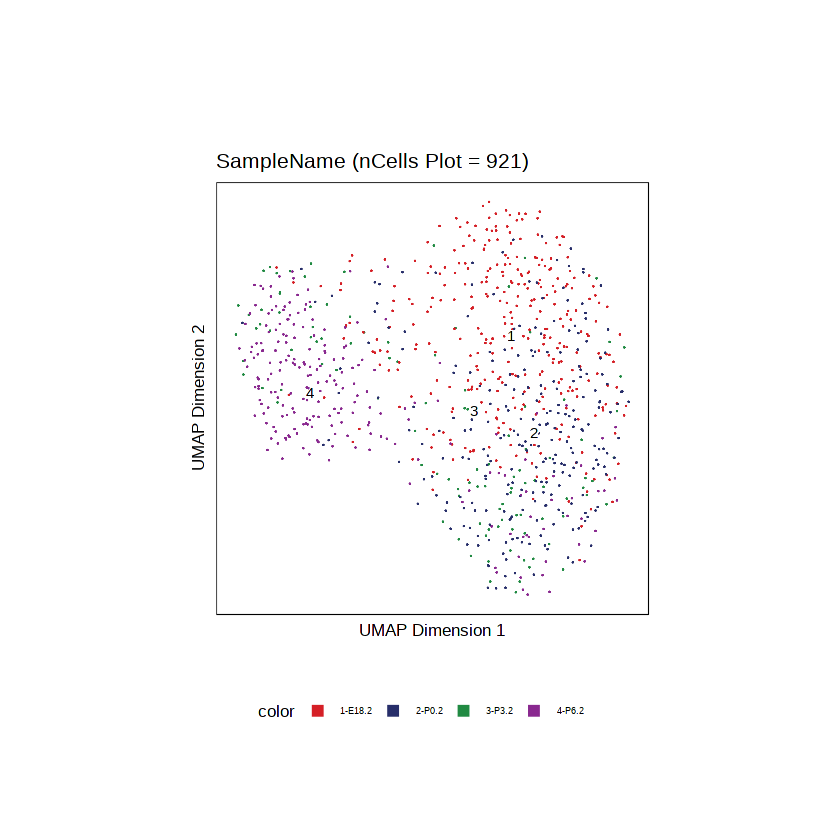

In [19]:

Merged.proj.LC <- addIterativeLSI(
    ArchRProj = Merged.proj.LC,
    useMatrix = "TileMatrix", 
    name = "IterativeLSI", 
    iterations = 4, 
    clusterParams = list( #See Seurat::FindClusters
        resolution = c(0.7), 
        sampleCells = 10000, 
        n.start = 10,
        algorithm= 1    ), 
    varFeatures = 150000, 
    dimsToUse = 1:30,
    force = TRUE
)



In [20]:
Merged.proj.LC <- addUMAP(
    ArchRProj = Merged.proj.LC, 
    reducedDims = "IterativeLSI", 
    name = "UMAP", 
    nNeighbors = 30, 
    minDist = 0.5, 
    metric = "cosine",
    force = TRUE
)

11:03:17 UMAP embedding parameters a = 0.583 b = 1.334

11:03:17 Read 921 rows and found 30 numeric columns

11:03:17 Using Annoy for neighbor search, n_neighbors = 30

11:03:17 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

11:03:17 Writing NN index file to temp file /tmp/RtmphGoej3/file58f25c70cfc1

11:03:17 Searching Annoy index using 12 threads, search_k = 3000

11:03:17 Annoy recall = 100%

11:03:18 Commencing smooth kNN distance calibration using 12 threads

11:03:18 Initializing from normalized Laplacian + noise

11:03:18 Commencing optimization for 500 epochs, with 44158 positive edges

11:03:20 Optimization finished



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-58f22807c5f-Date-2020-10-21_Time-12-25-05.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
2 
3 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-58f22807c5f-Date-2020-10-21_Time-12-25-05.log



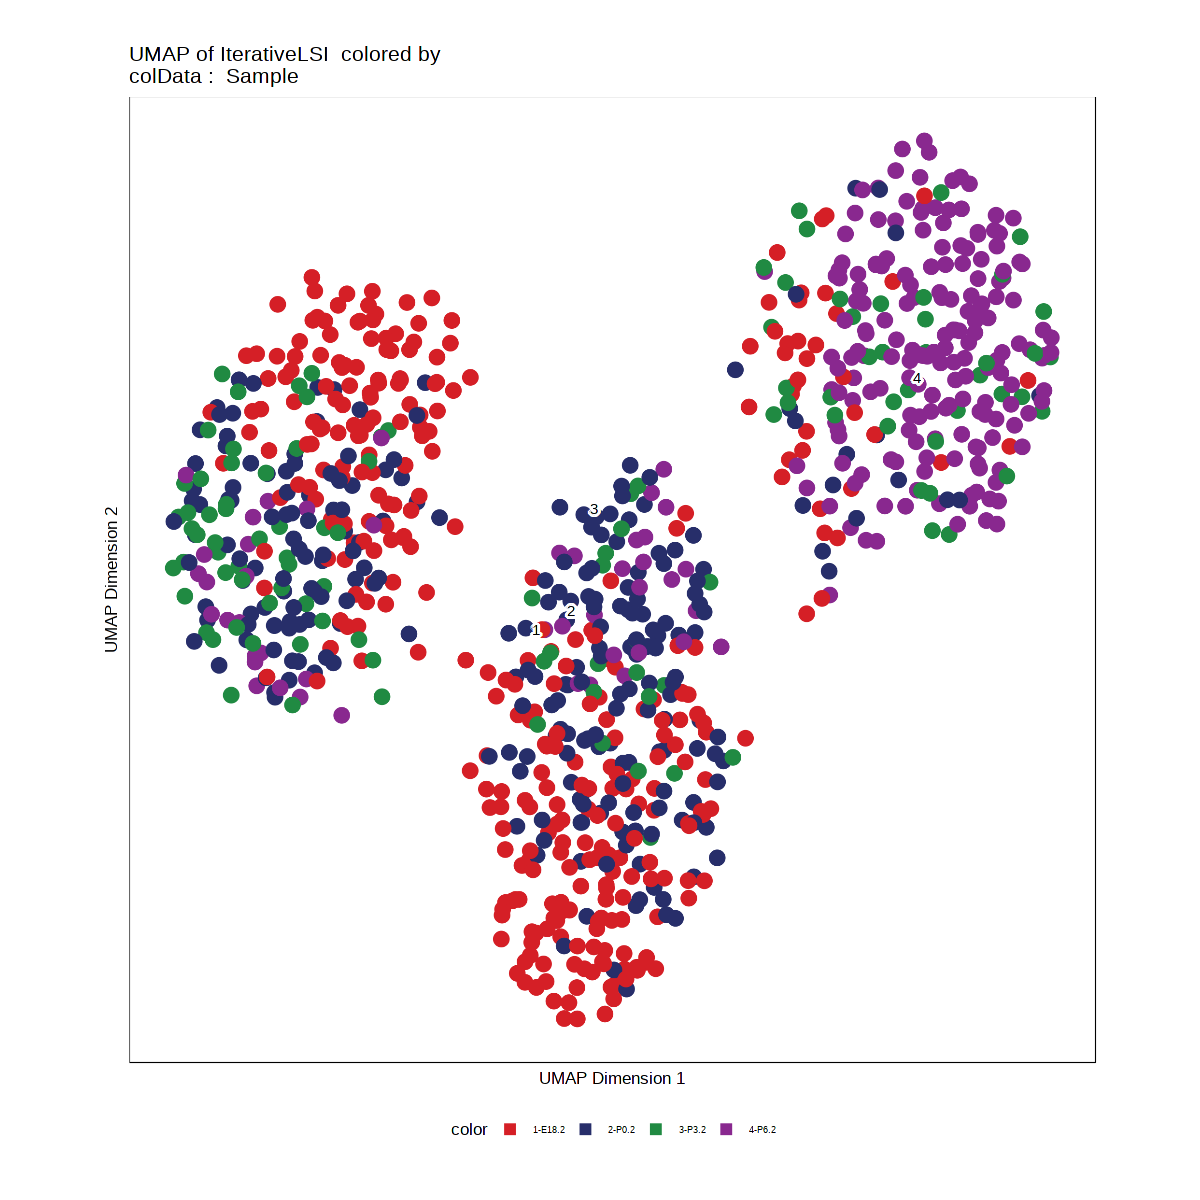

$Sample

$Seurat.Clusters

$Scran.Clusters


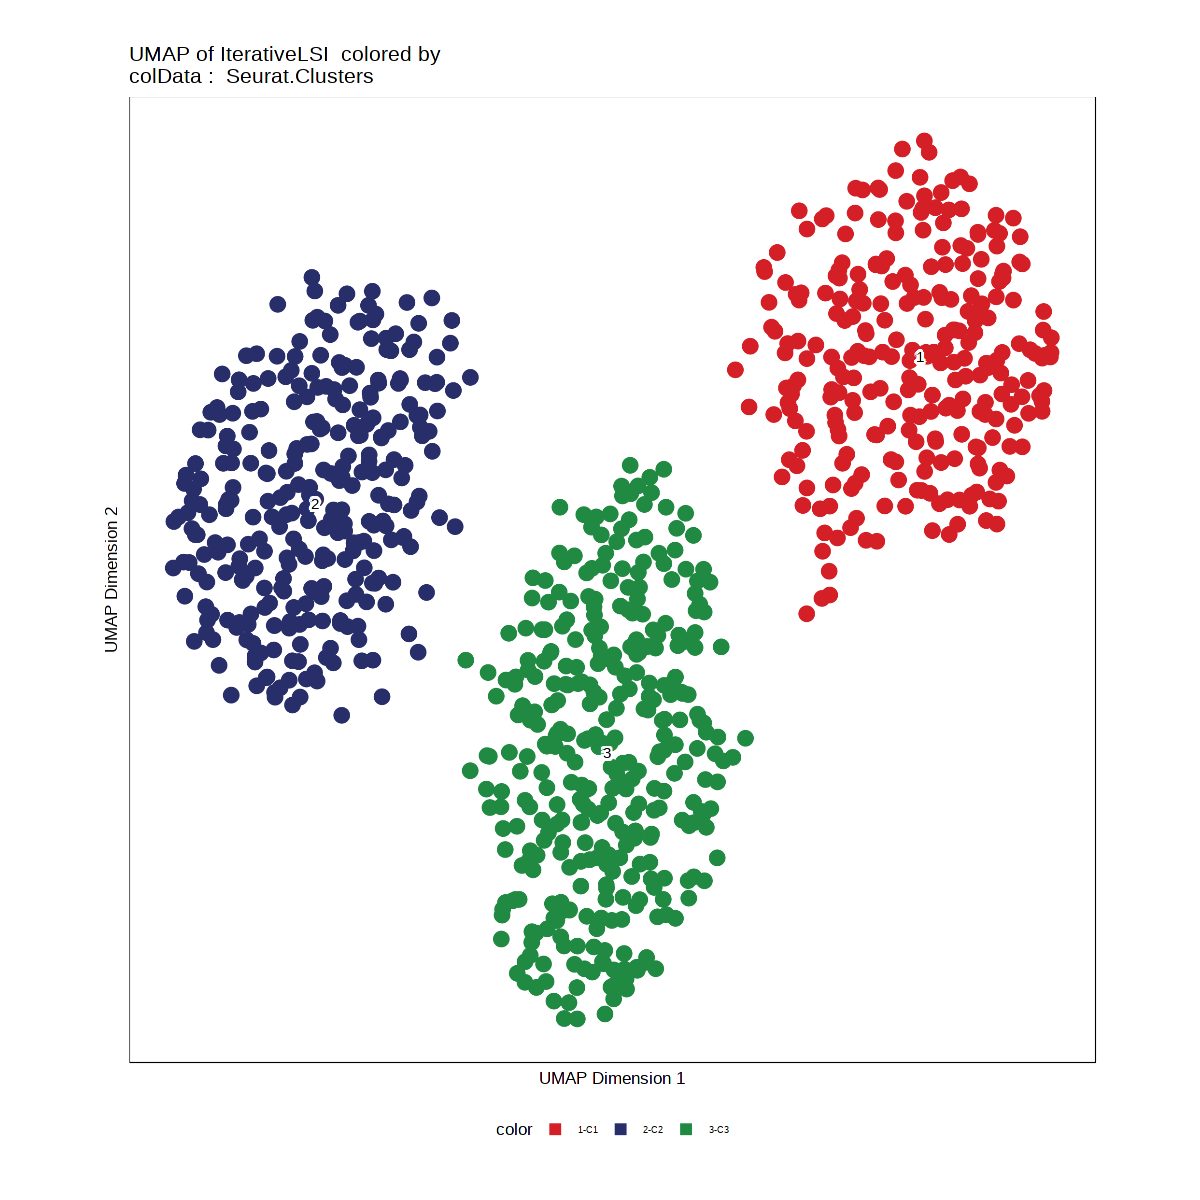

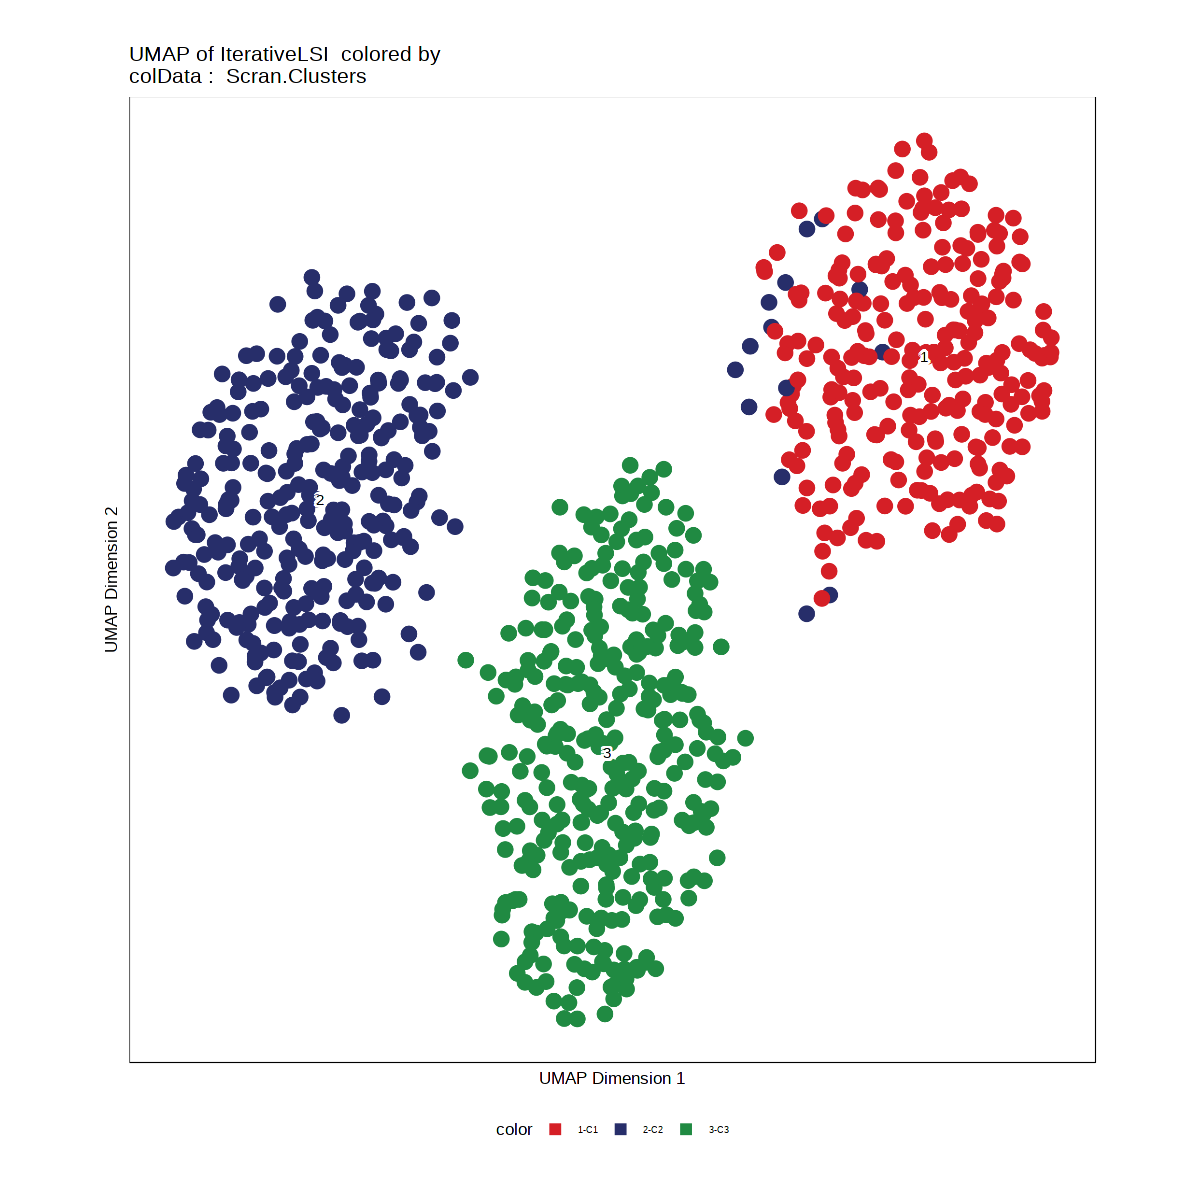

In [220]:
p1 <- plotEmbedding(
    Merged.proj.LC, 
    colorBy = "cellColData", 
    name = c("Sample"
            , "Seurat.Clusters", "Scran.Clusters"
            ), 
#      pal = pal,
    size=3,
    plotAs = "points"
)
p1

In [24]:

Merged.proj.LC <- addClusters(
    input = Merged.proj.LC,
    reducedDims = "IterativeLSI",
    method = "Seurat",
    name = "Seurat.Clusters",
    resolution = 1,
    force= TRUE
)

ArchR logging to : ArchRLogs/ArchR-addClusters-58f23ac88db2-Date-2020-10-20_Time-11-05-58.log
If there is an issue, please report to github with logFile!

Overriding previous entry for Seurat.Clusters

2020-10-20 11:05:58 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.001 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 921
Number of edges: 61662

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6451
Number of communities: 3
Elapsed time: 0 seconds


2020-10-20 11:06:00 : Testing Outlier Clusters, 0.024 mins elapsed.

2020-10-20 11:06:00 : Assigning Cluster Names to 3 Clusters, 0.024 mins elapsed.

2020-10-20 11:06:00 : Finished addClusters, 0.025 mins elapsed.



### Integrate with scRNA-Seq

In [26]:
LC.seRNA <- readRDS("~/Gonocyte/LC.withoutCCA.rds")


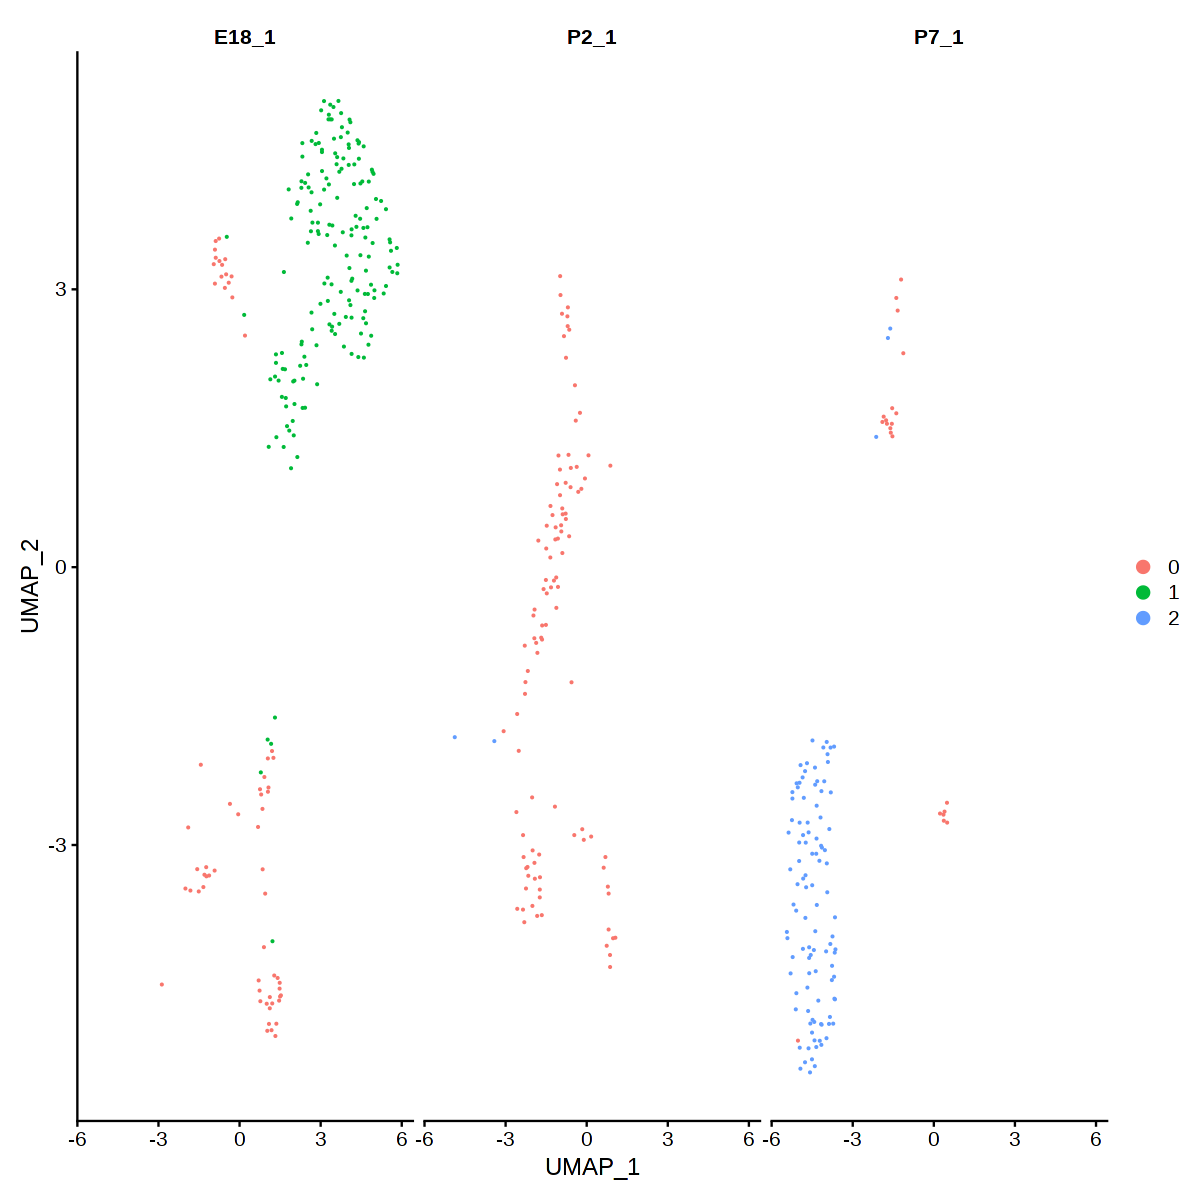

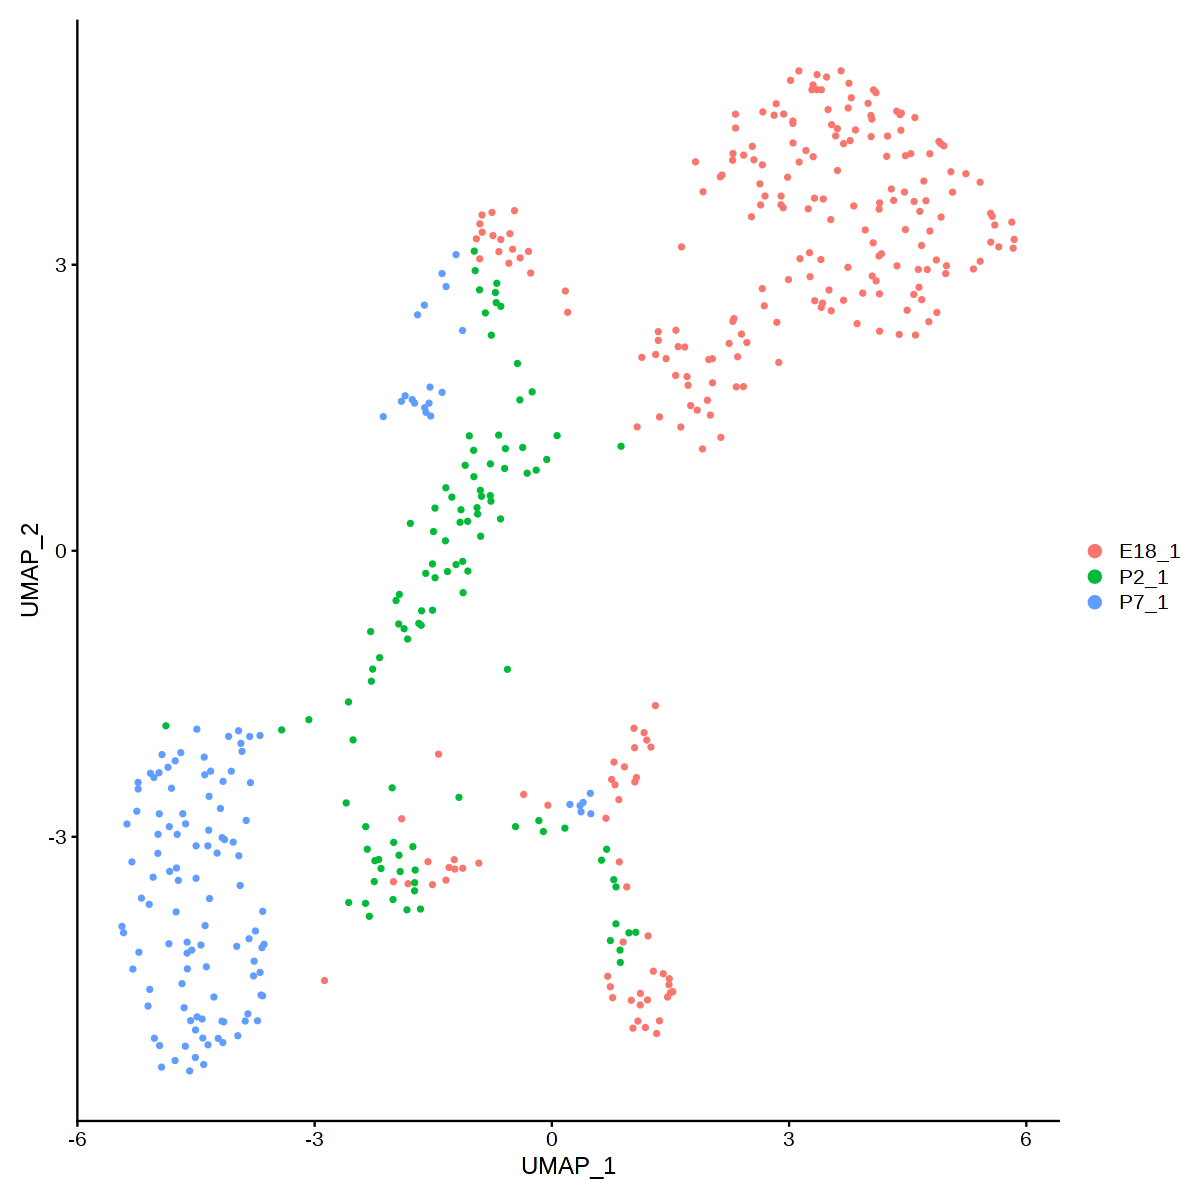

In [27]:
options(repr.plot.height=10,repr.plot.width=10)
DimPlot(LC.seRNA, reduction = "umap",group.by = "seurat_clusters", label = FALSE,split.by="sample",pt.size = 0.1)
DimPlot(LC.seRNA, reduction = "umap",group.by = "sample", label = FALSE)
#dev.off()

Warning message in FetchData(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: Cyp26c1”
Warning message in FetchData(object = object, vars = features, cells = cells):
“The following requested variables were not found: Cyp26c1”


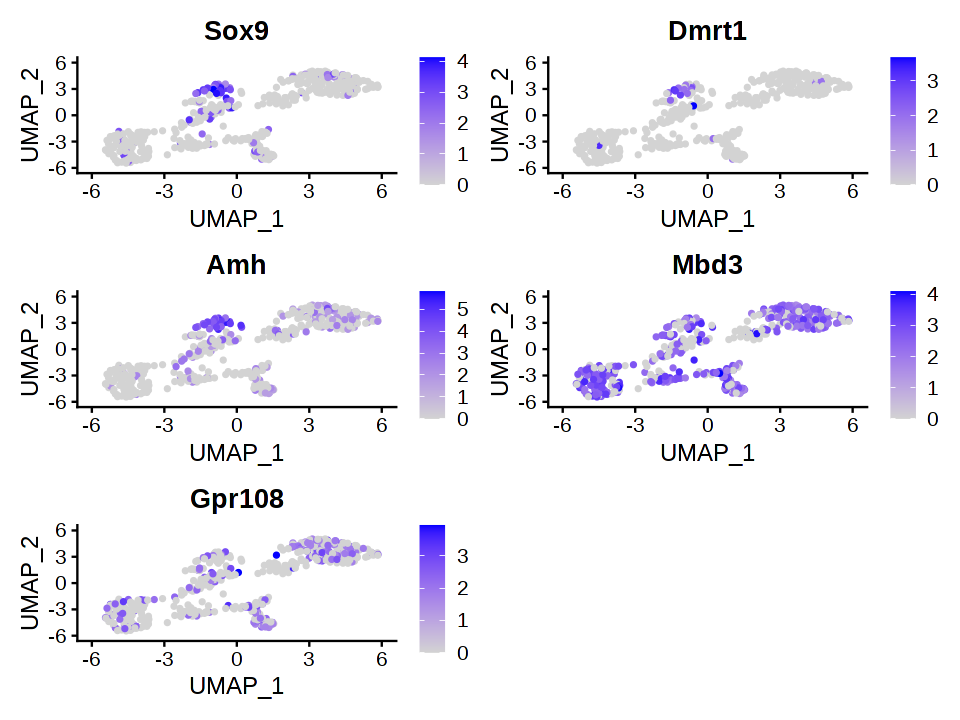

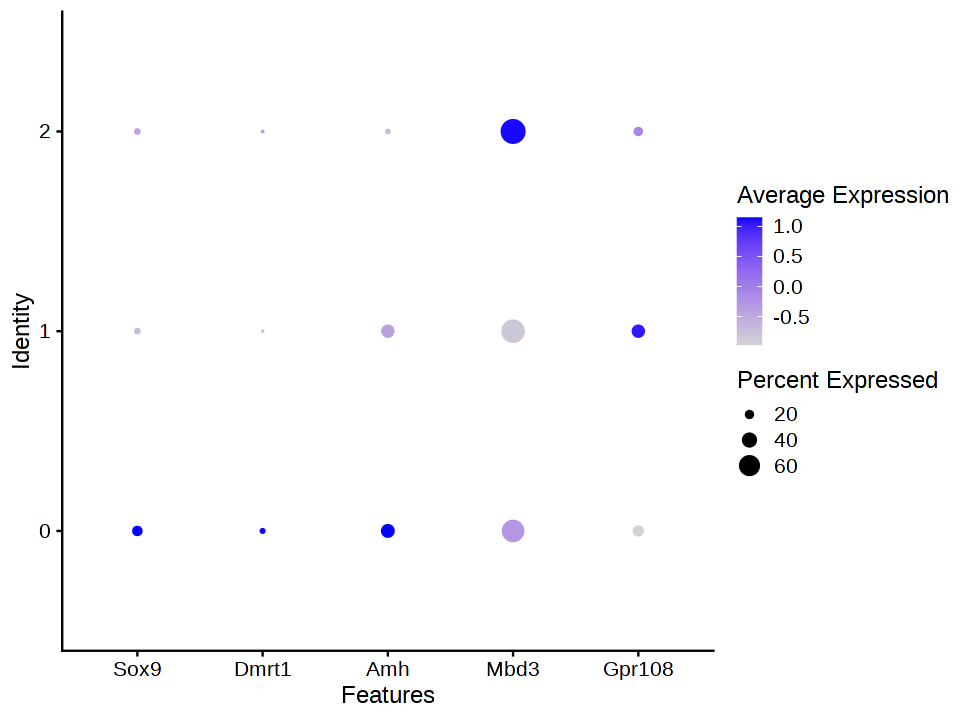

In [51]:
FeaturePlot(LC.seRNA, features = c("Sox9", "Dmrt1", "Amh", "Mbd3", "Gpr108", "Cyp26c1"))
DotPlot(LC.seRNA, features = c("Sox9", "Dmrt1", "Amh", "Mbd3", "Gpr108", "Cyp26c1"))


In [28]:
Merged.proj.LC <- addGeneIntegrationMatrix(
    ArchRProj = Merged.proj.LC, 
    useMatrix = "GeneScoreMatrix",
    matrixName = "GeneIntegrationMatrix",
    reducedDims = "IterativeLSI",
    seRNA = LC.seRNA,
    addToArrow = TRUE,
    groupATAC = "Sample",
    #test option below
    groupRNA = "sample",
    nameCell = "predictedCell_Un",
    nameGroup = "predictedGroup_Un",
    nameScore = "predictedScore_Un",
    force = TRUE)

ArchR logging to : ArchRLogs/ArchR-addGeneIntegrationMatrix-58f27559559d-Date-2020-10-20_Time-11-09-32.log
If there is an issue, please report to github with logFile!

2020-10-20 11:09:32 : Running Seurat's Integration Stuart* et al 2019, 0.003 mins elapsed.

2020-10-20 11:09:32 : Checking ATAC Input, 0.008 mins elapsed.

2020-10-20 11:09:32 : Checking RNA Input, 0.008 mins elapsed.

2020-10-20 11:09:33 : Creating Integration Blocks, 0.024 mins elapsed.

2020-10-20 11:09:33 : Prepping Interation Data, 0.024 mins elapsed.

2020-10-20 11:09:33 : Computing Integration in 1 Integration Blocks!, 0 mins elapsed.

2020-10-20 11:09:33 : Block (1 of 1) : Computing Integration, 0 mins elapsed.

2020-10-20 11:09:34 : Block (1 of 1) : Identifying Variable Genes, 0.006 mins elapsed.

2020-10-20 11:09:35 : Block (1 of 1) : Getting GeneScoreMatrix, 0.022 mins elapsed.

2020-10-20 11:09:38 : Block (1 of 1) : Imputing GeneScoreMatrix, 0.08 mins elapsed.

Getting ImputeWeights

2020-10-20 11:09:40 : Blo

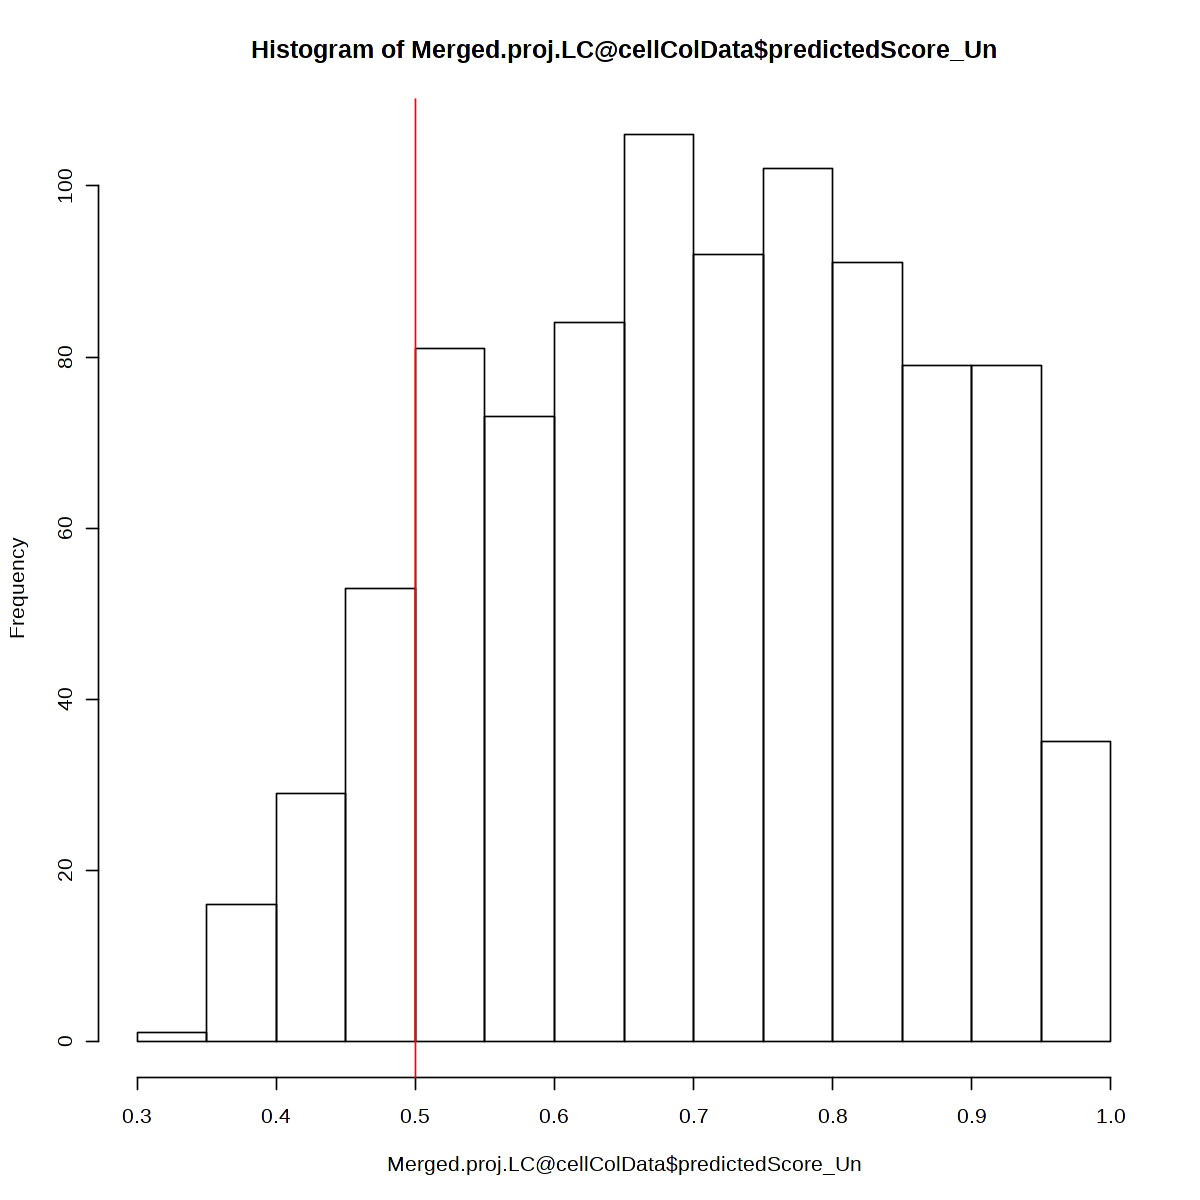

In [30]:
hist(Merged.proj.LC@cellColData$predictedScore_Un)
abline(v = 0.5, col = "red")

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-58f2203f5dbc-Date-2020-10-20_Time-11-12-37.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-58f2203f5dbc-Date-2020-10-20_Time-11-12-37.log



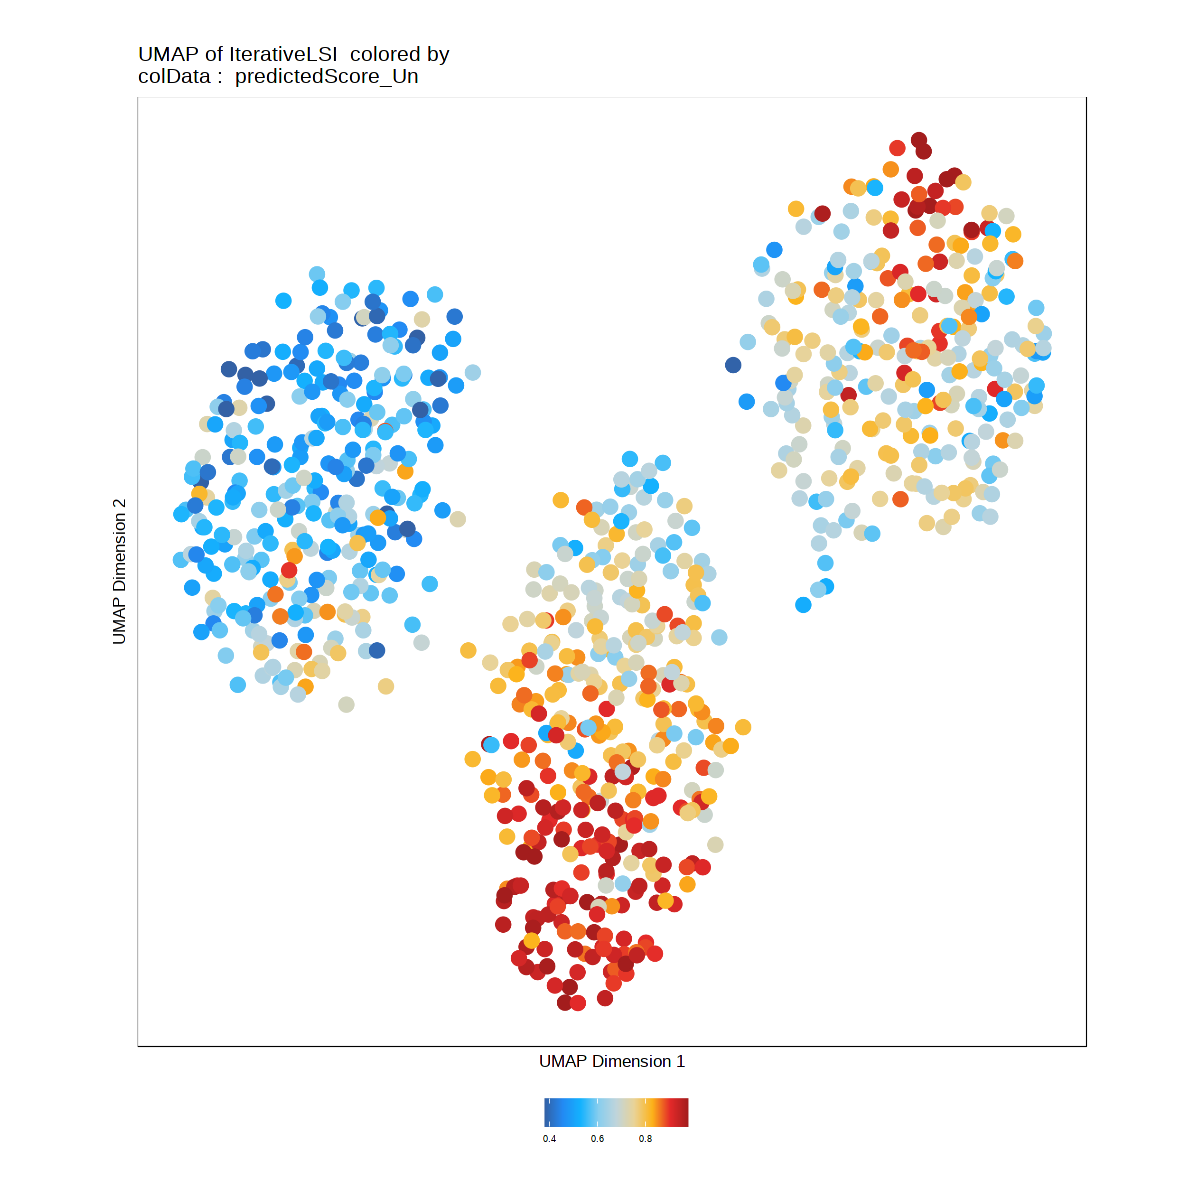

In [31]:
#  pal <- paletteDiscrete(values = germ.seRNA$idents.rename)
p1 <- plotEmbedding(
    Merged.proj.LC, 
    colorBy = "cellColData", 
    name = "predictedScore_Un", 
#      pal = pal,
    size=3,
    plotAs = "points"
)
p1

In [32]:
getAvailableMatrices(Merged.proj.LC)


[1] "Bulk.ATACMatrix"       "GeneIntegrationMatrix" "GeneScoreMatrix"      
[4] "MotifMatrix"           "PeakMatrix"            "TileMatrix"

In [9]:
Merged.proj.LC <- addImputeWeights(Merged.proj.LC,k=19,ka=3,td=2)

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-74274f10781-Date-2020-11-10_Time-16-15-39.log
If there is an issue, please report to github with logFile!

2020-11-10 16:15:39 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.



### Peak calling

In [35]:

Merged.proj.LC <- addGroupCoverages(ArchRProj = Merged.proj.LC, groupBy = "Seurat.Clusters")

ArchR logging to : ArchRLogs/ArchR-addGroupCoverages-58f250fa05b6-Date-2020-10-20_Time-11-17-06.log
If there is an issue, please report to github with logFile!

C1 (1 of 3) : CellGroups N = 2

C2 (2 of 3) : CellGroups N = 3

C3 (3 of 3) : CellGroups N = 3

2020-10-20 11:17:07 : Creating Coverage Files!, 0.008 mins elapsed.

2020-10-20 11:17:07 : Batch Execution w/ safelapply!, 0.008 mins elapsed.

2020-10-20 11:17:07 : Group C1._.P6.2 (1 of 8) : Creating Group Coverage File : C1._.P6.2.insertions.coverage.h5, 0.008 mins elapsed.

Number of Cells = 178

Coverage File Exists!

Added Coverage Group

Added Metadata Group

Added ArrowCoverage Class

Added Coverage/Info

Added Coverage/Info/CellNames

2020-10-20 11:17:22 : Group C1._.1 (2 of 8) : Creating Group Coverage File : C1._.1.insertions.coverage.h5, 0.267 mins elapsed.

Number of Cells = 94

Coverage File Exists!

Added Coverage Group

Added Metadata Group

Added ArrowCoverage Class

Added Coverage/Info

Added Coverage/Info/CellNames

In [36]:
pathToMacs2 <- findMacs2()
Merged.proj.LC <- addReproduciblePeakSet(
    ArchRProj = Merged.proj.LC, 
    groupBy = "Seurat.Clusters", 
    pathToMacs2 = pathToMacs2
)


Searching For MACS2..

Found with $path!

ArchR logging to : ArchRLogs/ArchR-addReproduciblePeakSet-58f27d98f3c4-Date-2020-10-20_Time-11-21-23.log
If there is an issue, please report to github with logFile!

Calling Peaks with Macs2

2020-10-20 11:21:23 : Peak Calling Parameters!, 0.005 mins elapsed.



   Group nCells nCellsUsed nReplicates nMin nMax maxPeaks
C1    C1    272        272           2   94  178   136000
C2    C2    299        277           3   51  130   138500
C3    C3    350        350           3   44  168   150000


2020-10-20 11:21:23 : Batching Peak Calls!, 0.005 mins elapsed.

2020-10-20 11:21:23 : Batch Execution w/ safelapply!, 0 mins elapsed.

2020-10-20 11:21:23 : Group 1 of 8, Calling Peaks with MACS2!, 0 mins elapsed.

Running Macs2 with Params : macs2 callpeak -g 1.87e+09 --name C1._.P6.2-1 --treatment /home/leetl/Gonocyte/Raw_data/Allcell.202009.wodoublet.filtering/PeakCalls/InsertionBeds/C1._.P6.2-1.insertions.bed --outdir /home/leetl/Gonocyte/Raw_data/Allcell.202009.wodoublet.filtering/PeakCalls/InsertionBeds --format BED --call-summits --keep-dup all --nomodel --nolambda --shift -75 --extsize 150 -q 0.1

2020-10-20 11:22:08 : Group 2 of 8, Calling Peaks with MACS2!, 0.746 mins elapsed.

Running Macs2 with Params : macs2 callpeak -g 1.87e+09 --name C1._.1-2 --treatment /home/leetl/Gonocyte/Raw_data/Allcell.202009.wodoublet.filtering/PeakCalls/InsertionBeds/C1._.1-2.insertions.bed --outdir /home/leetl/Gonocyte/Raw_data/Allcell.202009.wodoublet.filtering/PeakCalls/InsertionBeds --format

[1] "/home/leetl/Gonocyte/Raw_data/Allcell.202009.wodoublet.filtering/PeakCalls/C1-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/home/leetl/Gonocyte/Raw_data/Allcell.202009.wodoublet.filtering/PeakCalls/C2-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/home/leetl/Gonocyte/Raw_data/Allcell.202009.wodoublet.filtering/PeakCalls/C3-reproduciblePeaks.gr.rds"


2020-10-20 11:25:34 : Creating Union Peak Set!, 4.187 mins elapsed.

Converged after 4 iterations!

Plotting Ggplot!

2020-10-20 11:25:36 : Finished Creating Union Peak Set (63051)!, 4.225 mins elapsed.



In [37]:
Merged.proj.LC <- addPeakMatrix(Merged.proj.LC)

ArchR logging to : ArchRLogs/ArchR-addPeakMatrix-58f248429bb9-Date-2020-10-20_Time-11-25-36.log
If there is an issue, please report to github with logFile!

2020-10-20 11:25:36 : Batch Execution w/ safelapply!, 0 mins elapsed.

.createArrowGroup : Arrow Group already exists! Dropping Group from ArrowFile! This will take ~10-30 seconds!

.dropGroupsFromArrow : Initializing Temp ArrowFile

.dropGroupsFromArrow : Adding Metadata to Temp ArrowFile

.dropGroupsFromArrow : Adding SubGroups to Temp ArrowFile

.dropGroupsFromArrow : Move Temp ArrowFile to ArrowFile

2020-10-20 11:25:45 : Adding P3.2 to PeakMatrix for Chr (1 of 20)!, 0.003 mins elapsed.

2020-10-20 11:25:47 : Adding P3.2 to PeakMatrix for Chr (2 of 20)!, 0.027 mins elapsed.

2020-10-20 11:25:48 : Adding P3.2 to PeakMatrix for Chr (3 of 20)!, 0.051 mins elapsed.

2020-10-20 11:25:50 : Adding P3.2 to PeakMatrix for Chr (4 of 20)!, 0.074 mins elapsed.

2020-10-20 11:25:51 : Adding P3.2 to PeakMatrix for Chr (5 of 20)!, 0.098 mins 

In [38]:
Merged.proj.LC <- addMotifAnnotations(ArchRProj = Merged.proj.LC, motifSet = "cisbp", name = "Motif",force = TRUE)
Merged.proj.LC <- addBgdPeaks(Merged.proj.LC)


No methods found in package ‘IRanges’ for request: ‘score’ when loading ‘TFBSTools’

ArchR logging to : ArchRLogs/ArchR-addMotifAnnotations-58f26bbcdb5f-Date-2020-10-20_Time-11-28-05.log
If there is an issue, please report to github with logFile!

peakAnnotation name already exists! Overriding.

2020-10-20 11:28:07 : Gettting Motif Set, Species : Mus musculus, 0.003 mins elapsed.

Using version 2 motifs!

2020-10-20 11:28:08 : Finding Motif Positions with motifmatchr!, 0.025 mins elapsed.

2020-10-20 11:29:01 : Creating Motif Overlap Matrix, 0.915 mins elapsed.

2020-10-20 11:29:03 : Finished Getting Motif Info!, 0.94 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-addMotifAnnotations-58f26bbcdb5f-Date-2020-10-20_Time-11-28-05.log

Identifying Background Peaks!



In [39]:
Merged.proj.LC <- addDeviationsMatrix(
  ArchRProj = Merged.proj.LC, 
  peakAnnotation = "Motif",
  force = TRUE
)

Using Previous Background Peaks!

ArchR logging to : ArchRLogs/ArchR-addDeviationsMatrix-58f25171315a-Date-2020-10-20_Time-11-29-07.log
If there is an issue, please report to github with logFile!



NULL


2020-10-20 11:29:09 : Batch Execution w/ safelapply!, 0 mins elapsed.

.createArrowGroup : Arrow Group already exists! Dropping Group from ArrowFile! This will take ~10-30 seconds!

.dropGroupsFromArrow : Initializing Temp ArrowFile

.dropGroupsFromArrow : Adding Metadata to Temp ArrowFile

.dropGroupsFromArrow : Adding SubGroups to Temp ArrowFile

.dropGroupsFromArrow : Move Temp ArrowFile to ArrowFile

2020-10-20 11:29:19 : chromVAR deviations P3.2 (1 of 4) Schep (2017), 0.174 mins elapsed.

2020-10-20 11:29:21 : P3.2 (1 of 4) : Deviations for Annotation 44 of 884, 0.025 mins elapsed.

2020-10-20 11:29:23 : P3.2 (1 of 4) : Deviations for Annotation 88 of 884, 0.063 mins elapsed.

2020-10-20 11:29:26 : P3.2 (1 of 4) : Deviations for Annotation 132 of 884, 0.098 mins elapsed.

2020-10-20 11:29:28 : P3.2 (1 of 4) : Deviations for Annotation 176 of 884, 0.145 mins elapsed.

2020-10-20 11:29:31 : P3.2 (1 of 4) : Deviations for Annotation 220 of 884, 0.193 mins elapsed.

2020-10-20 11:29:3

### Find marker genes

In [26]:
markersGS <- getMarkerFeatures(
    ArchRProj = Merged.proj.LC, 
    useMatrix = "GeneScoreMatrix", 
    groupBy = "Seurat.Clusters",
    bias = c("TSSEnrichment", "log10(nFrags)"),
    k = 500,
    normBy = "ReadsInTSS",
    testMethod = "wilcoxon"
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-7427ef48212-Date-2020-11-10_Time-17-23-20.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Double.Matrix

2020-11-10 17:23:20 : Matching Known Biases, 0.001 mins elapsed.

2020-11-10 17:23:21 : Computing Pairwise Tests (1 of 3), 0.021 mins elapsed.

2020-11-10 17:23:39 : Computing Pairwise Tests (2 of 3), 0.322 mins elapsed.

2020-11-10 17:23:56 : Computing Pairwise Tests (3 of 3), 0.593 mins elapsed.

###########
2020-11-10 17:24:12 : Completed Pairwise Tests, 0.864 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-7427ef48212-Date-2020-11-10_Time-17-23-20.log



In [27]:
markerList <- getMarkers(markersGS, cutOff = "FDR <= 0.1 & Log2FC >= 0")
markerList$C1

DataFrame with 798 rows and 9 columns
      seqnames     start       end  strand          name     idx
         <Rle>   <array>   <array> <array>       <array> <array>
20822     chr8  11312805  11449287       1        Col4a2      57
20821     chr8  11312826  11198423       2        Col4a1      56
701       chr1 118954220 118954300       1       Mir6346     701
700       chr1 119053619 118834061       2          Gli2     700
15573     chr4 137468803 137570630       1         Hspg2    1134
...        ...       ...       ...     ...           ...     ...
22598     chr9  58455173  58469623       1 4930461G14Rik     660
4125     chr11 114765389 114790575       1        Kif19a    1620
23407     chrX  13042015  13045295       1 5730405O15Rik     117
24230     chrX 152368572 152416702       1 3010001F23Rik     940
3992     chr11 102885169 102886731       1       Fam187a    1487
                 Log2FC                  FDR           MeanDiff
              <numeric>            <numeric>         

In [28]:
C1.marker <- markerList$C1$name

In [29]:
C1.marker

[1] "Col4a2"        "Col4a1"        "Mir6346"       "Gli2"         
  [5] "Hspg2"         "Mir7689"       "Pdzrn3"        "Col1a1"       
  [9] "Col5a1"        "Tshz2"         "Sorcs2"        "Nr4a1"        
 [13] "Midn"          "AY702102"      "D630033O11Rik" "Cirbp"        
 [17] "Tubb6"         "Tspan9"        "Lrrk1"         "Sphk1"        
 [21] "Adcy7"         "Olfml3"        "Nfatc2"        "C130026L21Rik"
 [25] "Gm11544"       "A4galt"        "Pknox2"        "Lmna"         
 [29] "Rxra"          "A630075F10Rik" "Itgb3"         "Mir132"       
 [33] "Thbs2"         "Tagln2"        "Egr1"          "Aff3"         
 [37] "Wnt9a"         "Ahnak"         "Ltbp4"         "Il17b"        
 [41] "Mir212"        "Gm23363"       "Mir7011"       "Map7d1"       
 [45] "E130006D01Rik" "Pde2a"         "Piezo1"        "Eml1"         
 [49] "Edn3"          "3930402G23Rik" "Ubash3b"       "Map1a"        
 [53] "Apol7d"        "Pou2f3"        "Csrp1"         "Col6a3"       
 [57] "Fn1"           "Has2os"        "Pdpn"          "Inf2"         
 [61] "Srxn1"         "Fam170b"       "Pnmal1"        "Fmod"         
 [65] "Hic1"          "C1qtnf2"       "Smoc2"         "A730056A06Rik"
 [69] "Mir199b"       "Fam241b"       "Icosl"         "Cyth4"        
 [73] "Aqp2"          "B3gnt8"        "Mical2"        "Got1"         
 [77] "Galnt16"       "Egflam"        "Carmn"         "Mxra8"        
 [81] "Uaca"          "Gm833"         "Meox1"         "Tlr9"         
 [85] "Slit3"         "2210407C18Rik" "Tenm4"         "Mir6944"      
 [89] "Btg2"          "Gm16336"       "Cxcl14"        "BB123696"     
 [93] "Pmp22"         "Rtn2"          "Rasd1"         "Gm10787"      
 [97] "Lyrm1"         "Zfp423"        "Emilin2"       "Tmem211"      
[101] "Ephb3"         "Thbs3"         "Mrvi1"         "Mir199a-1"    
[105] "1810020O05Rik" "Gm38671"       "Mir5110"       "Clec3b"       
[109] "Cbx6"          "Mir181c"       "Phlda3"        "Tppp"         
[113] "Scfd2"         "BB014433"      "Atg101"        "Mmp2"         
[117] "Pdlim3"        "Ror2"          "Mtx1"          "Gm13446"      
[121] "Chsy1"         "Pgf"           "Lamb3"         "Ggt5"         
[125] "Dlk1"          "Sema5b"        "Hk2"           "Tmem273"      
[129] "4933433H22Rik" "Sulf2"         "Bcl2l1"        "Hrh1"         
[133] "Mir7000"       "Cygb"          "Tcf21"         "Lrfn4"        
[137] "Mapk8ip1"      "Eng"           "Col16a1"       "Dlg4"         
[141] "Mir6995"       "Snord35b"      "Gm19277"       "Tnxb"         
[145] "Ggta1"         "Peli2"         "Twist2"        "Tns1"         
[149] "Rps11"         "1700088E04Rik" "Grk3"          "Klf2"         
[153] "Bcl9l"         "Lrrc32"        "Serpinh1"      "Dcun1d3"      
[157] "Has2"          "Nfatc1"        "Fmnl3"         "Arf2"         
[161] "Nhsl2"         "S100a6"        "Nfix"          "Gamt"         
[165] "Cenpm"         "Fam76a"        "Zfp664"        "Mcf2l"        
[169] "Fos"           "Rassf2"        "4930568G15Rik" "F7"           
[173] "Rcn3"          "Piwil4"        "Optc"          "Ccdc88c"      
[177] "Vasn"          "Il19"          "Mmp28"         "Prr5"         
[181] "Adcy5"         "Dnm1"          "Kirrel"        "Ncdn"         
[185] "Mir6407"       "Rdh8"          "Btbd2"         "Zfp142"       
[189] "5031425F14Rik" "Cep41"         "Loxl1"         "Mir143"       
[193] "Atp2b4"        "Eva1b"         "Id1"           "Fcamr"        
[197] "Cfap45"        "Crispld2"      "Sapcd1"        "Gm10560"      
[201] "Lsp1"          "Prmt5"         "Polr2f"        "Opn1sw"       
[205] "Mir6371"       "Mir23a"        "Nop53"         "Dbn1"         
[209] "Gm16617"       "Kcnk16"        "Mymx"          "Cd248"        
[213] "Gm14812"       "Mfap4"         "Ccnd3"         "Nfkb2"        
[217] "Gm11468"       "Morn1"         "Has1"          "Scn2b"        
[221] "Cd2bp2"        "Dennd2a"       "Mir5046"       "Bcs1l"        
[225] "Elfn2"         "Med9"          "Cacng7"        "4931431C16Rik"
[229] "Psapl

### Run GO analysis

In [30]:
# cluster<- row.names.data.frame(cluster.markers)
library(clusterProfiler)
C1.marker=bitr(C1.marker,fromType = "SYMBOL",toType = c("ENTREZID"),OrgDb = "org.Mm.eg.db")

C1.marker.go<-enrichGO(gene=C1.marker[,"ENTREZID"],keyType = "ENTREZID",OrgDb=org.Mm.eg.db,ont = "ALL",pAdjustMethod = "BH",pvalueCutoff = 0.2,qvalueCutoff = 0.2,readable = TRUE)


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(C1.marker, fromType = "SYMBOL", toType = c("ENTREZID"), :
“0.75% of input gene IDs are fail to map...”


In [31]:
C1.marker.go

#
# over-representation test
#
#...@organism 	 Mus musculus 
#...@ontology 	 GOALL 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:792] "12827" "12826" "102465176" "14633" "15530" "102465792" ...
#...pvalues adjusted by 'BH' with cutoff <0.2 
#...967 enriched terms found
'data.frame':	967 obs. of  10 variables:
 $ ONTOLOGY   : Factor w/ 3 levels "BP","CC","MF": 1 1 1 1 1 1 1 1 1 1 ...
 $ ID         : chr  "GO:0030198" "GO:0043062" "GO:1901342" "GO:0032963" ...
 $ Description: chr  "extracellular matrix organization" "extracellular structure organization" "regulation of vasculature development" "collagen metabolic process" ...
 $ GeneRatio  : chr  "37/666" "39/666" "33/666" "18/666" ...
 $ BgRatio    : chr  "271/23210" "315/23210" "341/23210" "109/23210" ...
 $ pvalue     : num  3.49e-15 1.65e-14 1.30e-09 2.03e-09 2.61e-09 ...
 $ p.adjust   : num  1.60e-11 3.80e-11 1.99e-06 2.33e-06 2.39e-06 ...
 $ qvalue     : num  1.32e-11 3.12e-11 1.63e-06 1.91e-06 1.97e-06 ...
 $ geneID     : chr  "Col

In [72]:
library("viridis") 
library(patchwork)
g1 <-   dotplot(C1.marker.go, showCategory =10, title = "Cluster 1")+ scale_color_viridis(option = "cividis",direction = -1) + scale_size(range=c(1, 5)) +
        theme(axis.text=element_text(size=10,face="plain"),axis.text.x = element_text(angle = 90, hjust = 1),
        axis.title=element_text(size=20,face="plain"))+scale_y_discrete(position = "right") 

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.



In [234]:
options(repr.plot.width=5,repr.plot.height=30)
heatmapGS <- plotMarkerHeatmap(
  seMarker = markersGS, 
  cutOff = "FDR <= 0.1 & Log2FC >= 0.5", 
 labelMarkers = markerGenes,
  transpose = TRUE
)

ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-58f2658db48d-Date-2020-10-21_Time-12-52-18.log
If there is an issue, please report to github with logFile!

Printing Top Marker Genes:

C1:

	Aff3, Fn1, Apol7d, Zfp142, Bcs1l, Dnajb2, Gmppa, B3gnt7, Ecel1, Prss56, Col6a3, Twist2, Crocc2, Pign, Gli2, Mir6346, Fcamr, Il19, Ikbke, Atp2b4

C2:

	Plekhb2, Lyg2, Map4k4, Akr1cl, Sgpp2, Sctr, Slc45a3, Atp6v1g3, Dennd1b, 1700025G04Rik, Rassf9, Znrf3, Smim6, Mir6387, Rsad2, C630031E19Rik, 2310016D03Rik, Dip2c, Sfrp4, Nedd9

C3:

	Ap1b1, Zfp503, Rnmt, Cyp26c1, Jun, Zfp467, Plekhb2, Lyg2, Aff3, Map4k4, Akr1cl, Fn1, Apol7d, Zfp142, Bcs1l, Dnajb2, Gmppa, Sgpp2, B3gnt7, Ecel1

Identified 761 markers!

Adding Annotations..

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotMarkerHeatmap-58f2658db48d-Date-2020-10-21_Time-12-52-18.log



### Find positive TF regulators

In [41]:
seGroupMotif <- getGroupSE(ArchRProj = Merged.proj.LC, useMatrix = "MotifMatrix", groupBy = "Seurat.Clusters")
seGroupMotif

ArchR logging to : ArchRLogs/ArchR-getGroupSE-7427a6b1a55-Date-2020-11-10_Time-17-33-26.log
If there is an issue, please report to github with logFile!

Getting Group Matrix

2020-11-10 17:33:26 : Constructing Group Matrix 1 of 2, 0 mins elapsed.

2020-11-10 17:33:27 : Finished Group Matrix 1 of 2, 0.019 mins elapsed.

2020-11-10 17:33:27 : Constructing Group Matrix 2 of 2, 0.02 mins elapsed.

2020-11-10 17:33:28 : Finished Group Matrix 2 of 2, 0.035 mins elapsed.

2020-11-10 17:33:28 : Successfully Created Group Matrix, 0.035 mins elapsed.

Normalizing by number of Cells

ArchR logging successful to : ArchRLogs/ArchR-getGroupSE-7427a6b1a55-Date-2020-11-10_Time-17-33-26.log



class: SummarizedExperiment 
dim: 1768 3 
metadata(0):
assays(1): MotifMatrix
rownames(1768): f1 f2 ... f1767 f1768
rowData names(3): seqnames idx name
colnames(3): C1 C2 C3
colData names(20): TSSEnrichment ReadsInTSS ...
  predictedScore_Un_woharmony nCells

In [42]:
seZ <- seGroupMotif[rowData(seGroupMotif)$seqnames=="z",]
rowData(seZ)$maxDelta <- lapply(seq_len(ncol(seZ)), function(x){
  rowMaxs(assay(seZ) - assay(seZ)[,x])
}) %>% Reduce("cbind", .) %>% rowMaxs

In [84]:

corGIM_MM <- correlateMatrices(
    ArchRProj = Merged.proj.LC,
    useMatrix1 = "GeneIntegrationMatrix",
    useMatrix2 = "MotifMatrix",
    reducedDims = "IterativeLSI"
)
corGIM_MM

ArchR logging to : ArchRLogs/ArchR-correlateMatrices-7427658ec0e0-Date-2020-11-11_Time-11-42-29.log
If there is an issue, please report to github with logFile!

When accessing features from a matrix of class Sparse.Assays.Matrix it requires 1 seqname!
Continuing with first seqname 'z'!
If confused, try getFeatures(ArchRProj, 'MotifMatrix') to list out available seqnames for input!

2020-11-11 11:42:30 : Testing 748 Mappings!, 0.014 mins elapsed.

2020-11-11 11:42:30 : Computing KNN, 0.014 mins elapsed.

2020-11-11 11:42:30 : Identifying Non-Overlapping KNN pairs, 0.015 mins elapsed.

2020-11-11 11:42:32 : Identified 442 Groupings!, 0.041 mins elapsed.

2020-11-11 11:42:32 : Getting Group Matrix 1, 0.048 mins elapsed.

2020-11-11 11:42:55 : Getting Group Matrix 2, 0.423 mins elapsed.

Some entries in groupMat2 are less than 0, continuing without Log2 Normalization.
Most likely this assay is a deviations matrix.

Getting Correlations...

2020-11-11 11:42:57 : 

Computing Correlation (250

DataFrame with 748 rows and 14 columns
    GeneIntegrationMatrix_name MotifMatrix_name                cor
                       <array>          <array>          <numeric>
1                        Sox17        Sox17_733 -0.101753175012955
2                        Mybl1        Mybl1_647  0.391550401495112
3                          Msc           Msc_43 -0.568366364612608
4                       Arid5a         Arid5a_9 -0.246662960213009
5                        Npas2         Npas2_44 -0.265277556065328
...                        ...              ...                ...
744                     Zfp711       Zfp711_168   0.12895595634247
745                       Esx1         Esx1_444                 NA
746                       Klf8         Klf8_194  -0.56358150316211
747                     Mbtps2       Mbtps2_813 -0.210971624089136
748                       Zfy1         Zfy1_213                 NA
                    padj                 pval GeneIntegrationMatrix_seqnames
             

In [ ]:
library(ggplot2)
library(gghighlight)
library(ggrepel)

[1] "Ar"     "Bach2"  "Creb1"  "E2f4"   "E2f8"   "Esr2"   "Gabpa"  "Gata1" 
 [9] "Gli1"   "Gli2"   "Gli3"   "Klf12"  "Meis2"  "Nfia"   "Nfya"   "Nr1d1" 
[17] "Nr1d2"  "Nr1h2"  "Nr2f1"  "Nr3c1"  "Nr4a1"  "Nr5a1"  "Nr6a1"  "Patz1" 
[25] "Pgr"    "Ppara"  "Rest"   "Runx1"  "Snai1"  "Sp3"    "Sp4"    "Stat5b"
[33] "Tcf21"  "Tgif1"  "Thrb"   "Yy1"    "Zfp143"

Warning message:
“Removed 274 rows containing missing values (geom_point).”


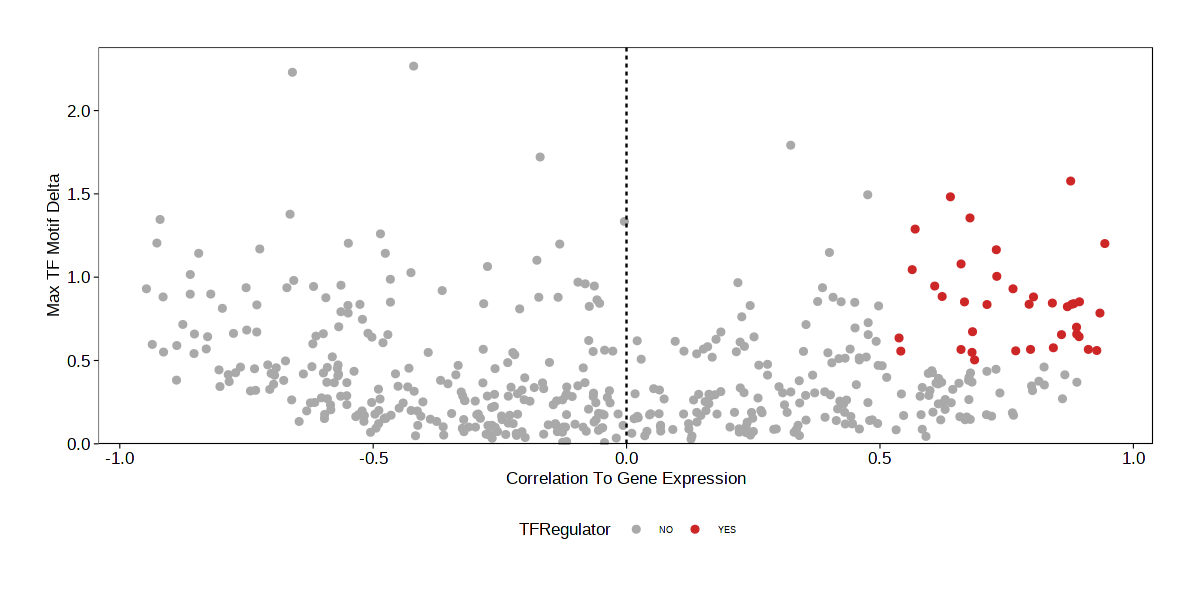

In [86]:

corGIM_MM$maxDelta <- rowData(seZ)[match(corGIM_MM$MotifMatrix_name, rowData(seZ)$name), "maxDelta"]
corGIM_MM <- corGIM_MM[order(abs(corGIM_MM$cor), decreasing = TRUE), ]
corGIM_MM <- corGIM_MM[which(!duplicated(gsub("\\-.*","",corGIM_MM[,"MotifMatrix_name"]))), ]
corGIM_MM$TFRegulator <- "NO"
corGIM_MM$TFRegulator[which(corGIM_MM$cor > 0.5 & corGIM_MM$padj < 0.01 & corGIM_MM$maxDelta > quantile(corGIM_MM$maxDelta, 0.75))] <- "YES"
sort(corGIM_MM[corGIM_MM$TFRegulator=="YES",1])

p <- ggplot(data.frame(corGIM_MM), aes(cor, maxDelta, color = TFRegulator)) +
  geom_point() + 
  theme_ArchR() +
  geom_vline(xintercept = 0, lty = "dashed") + 
  scale_color_manual(values = c("NO"="darkgrey", "YES"="firebrick3")) +
  xlab("Correlation To Gene Expression") +
  ylab("Max TF Motif Delta") +
  scale_y_continuous(
    expand = c(0,0), 
    limits = c(0, max(corGIM_MM$maxDelta)*1.05)
  )

p

In [89]:
positive.TF.GIM <- sort(corGIM_MM[corGIM_MM$TFRegulator=="YES",1])
positive.TF.GIM

[1] "Ar"     "Bach2"  "Creb1"  "E2f4"   "E2f8"   "Esr2"   "Gabpa"  "Gata1" 
 [9] "Gli1"   "Gli2"   "Gli3"   "Klf12"  "Meis2"  "Nfia"   "Nfya"   "Nr1d1" 
[17] "Nr1d2"  "Nr1h2"  "Nr2f1"  "Nr3c1"  "Nr4a1"  "Nr5a1"  "Nr6a1"  "Patz1" 
[25] "Pgr"    "Ppara"  "Rest"   "Runx1"  "Snai1"  "Sp3"    "Sp4"    "Stat5b"
[33] "Tcf21"  "Tgif1"  "Thrb"   "Yy1"    "Zfp143"

In [93]:
rownames(markersGIM) <- rowData(markersGIM)$name
colData(markersGIM)$celltype <- colnames(markersGIM)

In [94]:
rownames(seZ) <- gsub("_.*","",rowData(seZ)$name)
colData(seZ)$celltype <- colData(seZ)$Seurat.Clusters
seZ

class: SummarizedExperiment 
dim: 884 3 
metadata(0):
assays(1): MotifMatrix
rownames(884): Tcfap2a Tcfap2b ... Smad5 Smad9
rowData names(4): seqnames idx name maxDelta
colnames(3): C1 C2 C3
colData names(20): TSSEnrichment ReadsInTSS ...
  predictedScore_Un_woharmony nCells

In [95]:
saveRDS(markersGIM,file="LC.markersGIM.GIM.rds")
saveRDS(seZ,file="LC.seZ.GIM.rds")
saveRDS(positive.TF.GIM,file="LC.postiveTF.GIM.rds")

In [11]:
p2g.df <- getPeak2GeneLinks(
    ArchRProj = Merged.proj.LC,
    corCutOff = 0.2,
    resolution = 1,
    returnLoops = FALSE
)
p2g <- getPeak2GeneLinks(
    ArchRProj = Merged.proj.LC,
    corCutOff = 0.2,
    resolution = 1,
    returnLoops = TRUE
)


ArchR logging to : ArchRLogs/ArchR-plotPeak2GeneHeatmap-1b3e6d312c54-Date-2021-01-13_Time-15-29-33.log
If there is an issue, please report to github with logFile!

2021-01-13 15:29:35 : Determining KNN Groups!, 0.035 mins elapsed.

2021-01-13 15:29:37 : Ordering Peak2Gene Links!, 0.065 mins elapsed.

2021-01-13 15:29:39 : Constructing ATAC Heatmap!, 0.097 mins elapsed.

Adding Annotations..

Preparing Main Heatmap..

2021-01-13 15:29:39 : Constructing RNA Heatmap!, 0.101 mins elapsed.

Adding Annotations..

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotPeak2GeneHeatmap-1b3e6d312c54-Date-2021-01-13_Time-15-29-33.log



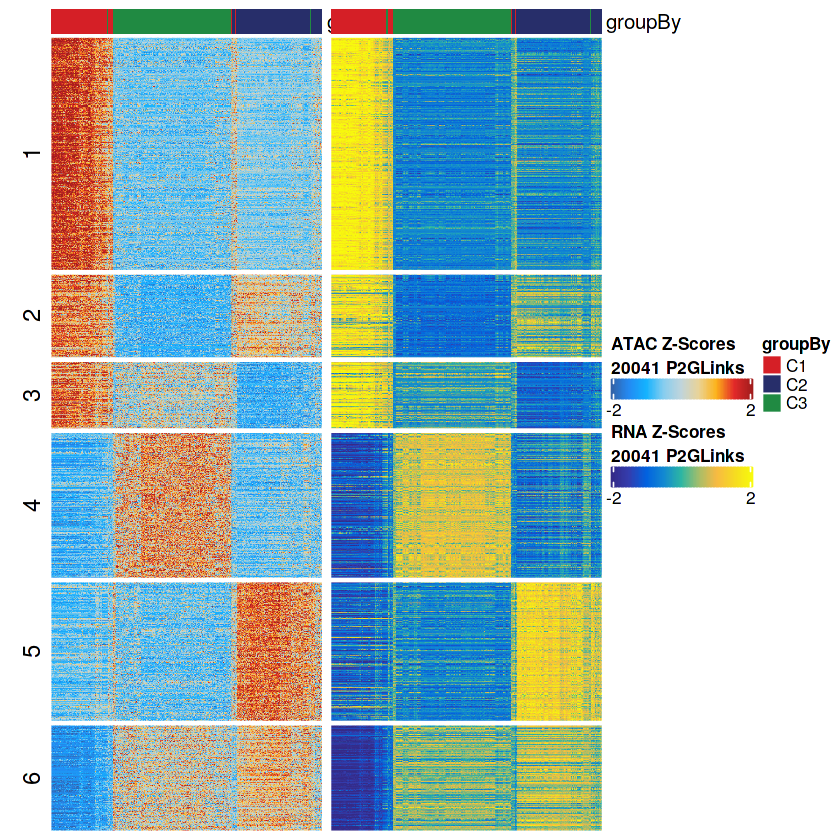

In [12]:
p <- plotPeak2GeneHeatmap(ArchRProj = Merged.proj.LC, groupBy = "Seurat.Clusters",corCutOff = 0.6,
       FDRCutOff = 1e-04,k = 6, returnMatrices = FALSE)
p